In [9]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
#from Inference.GeNVI_method import GeNVariationalInference, GeNetEns
from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [11]:
from Experiments.foong import Setup
layerwidth=50
nblayers=1
setup=Setup(device,layerwidth=layerwidth,nblayers=nblayers)


# Target density #

In [4]:
logprior=setup.logPredPrior
loglikelihood=setup.loglikelihood
projection=setup.projection
size_sample=setup.n_train_samples
param_count=setup.param_count
model=setup._model

size_sample

200

# GeNVI #

In [14]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001

GeN = GeNetEns(1, 2, 50, param_count, activation, 1.#0.2
               , init_b, device)

In [15]:
from Tools import logmvn01pdf

x=torch.arange(-3.,3., 0.05).to(device)

grid_X,grid_Y=torch.meshgrid(x, x)
colors=torch.Tensor(grid_X.shape)

for i in range(colors.shape[0]):
    for j in range(colors.shape[1]):
        xy=torch.Tensor([grid_X[i,j],grid_Y[i,j]]).unsqueeze(0).to(device)
        colors[i,j]=logmvn01pdf(xy,device).exp().cpu()


In [16]:
noise=(grid_X.cpu().numpy(),grid_Y.cpu().numpy(),colors.cpu().numpy())

-10.837877 -1.8378772


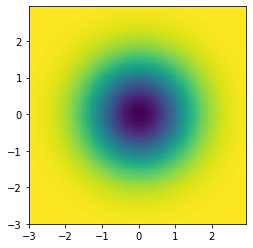

In [17]:
%matplotlib inline
import matplotlib.cm as cm

cmap = cm.viridis_r

plt.pcolormesh(noise[0],noise[1],noise[2],cmap=cmap)
plt.axis('scaled')
#plt.title('Gaussian noise')

print(np.log(noise[2].min()),np.log(noise[2].max()))
plt.savefig('noise.pdf')

In [18]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm



%matplotlib inline



def makePlot(self, GeN,noise, alpha=0.05 ,device=device):
    def get_linewidth(linewidth, axis):
        fig = axis.get_figure()
        ppi = 72  # matplolib points per inches
        length = fig.bbox_inches.height * axis.get_position().height
        value_range = np.diff(axis.get_ylim())[0]
        return linewidth * ppi * length / value_range
#    nb_samples_plot=theta.shape[0]
    x_lin = torch.linspace(-2.0, 2.0).unsqueeze(1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    plt.xlim(-2, 2) 
    plt.ylim(-3, 4.5)
    plt.grid(True, which='major', linewidth=0.5)
    my_lw=get_linewidth(0.2,ax)
#    alpha = (.9 / torch.tensor(float(nb_samples_plot)).sqrt()).clamp(0.05, 1.)
    
    colors=noise[2]
    
    norm=Normalize(vmin=colors.min(), vmax=colors.max())
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    
    for i in range(colors.shape[0]):
        for j in range(colors.shape[1]):
            xy_noise=torch.Tensor([noise[0][i,j],noise[1][i,j]]).unsqueeze(0).to(device)
            theta=GeN.components[0].hnet(xy_noise).detach()
            y_pred = self._normalized_prediction(x_lin, theta, device)
            color=m.to_rgba(colors[i,j])
            alpha_=alpha*(11+np.log(colors[i,j]))/9
            plt.plot(x_lin.detach().cpu().numpy(), y_pred.squeeze(0).detach().cpu().numpy(), alpha=alpha_, linewidth=1.0, color=color,zorder=3)
    plt.scatter(self._X_train.cpu(), self._y_train.cpu(), marker='.',color='black',zorder=4)
    return fig



In [19]:
%matplotlib inline
from tempfile import TemporaryDirectory

k_MC=300

def show(x,y):
    return

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
		                                    0, 100, 1000, 50, 50,
		                                    20000, .01, .00001, 200, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
#    optimizer = GeNVariationalInference(logtarget,
#		                                    1, 100, 1000, 50, 100,
#		                                    20000, .01, .000001, 500, .5,
#		                                    device, True, temp_dir, save_best=True)
#    best_epoch, scores=optimizer.run(GeN)
print(best_epoch)

Epoch [0/20000], Loss: 15261839.0, Entropy -5.589599609375, Learning Rate: 0.01
Epoch [1/20000], Loss: 9122174.0, Entropy -4.67529296875, Learning Rate: 0.01
Epoch [2/20000], Loss: 5036542.5, Entropy -20.996826171875, Learning Rate: 0.01
Epoch [3/20000], Loss: 2384092.5, Entropy -100.69775390625, Learning Rate: 0.01
Epoch [4/20000], Loss: 1236975.125, Entropy -116.781005859375, Learning Rate: 0.01
Epoch [5/20000], Loss: 896467.25, Entropy -114.0052490234375, Learning Rate: 0.01
Epoch [6/20000], Loss: 751499.625, Entropy -180.350341796875, Learning Rate: 0.01
Epoch [7/20000], Loss: 1020444.0, Entropy -135.0029296875, Learning Rate: 0.01
Epoch [8/20000], Loss: 1048010.1875, Entropy -148.7623291015625, Learning Rate: 0.01
Epoch [9/20000], Loss: 1313885.125, Entropy -173.307861328125, Learning Rate: 0.01
Epoch [10/20000], Loss: 1320608.25, Entropy -99.0096435546875, Learning Rate: 0.01
Epoch [11/20000], Loss: 1182981.25, Entropy -140.7906494140625, Learning Rate: 0.01
Epoch [12/20000], Los

Epoch [102/20000], Loss: 32942.9375, Entropy -376.25762939453125, Learning Rate: 0.01
Epoch [103/20000], Loss: 25458.087890625, Entropy -379.3355712890625, Learning Rate: 0.01
Epoch [104/20000], Loss: 24583.57421875, Entropy -394.48468017578125, Learning Rate: 0.01
Epoch [105/20000], Loss: 28998.8828125, Entropy -420.6456298828125, Learning Rate: 0.01
Epoch [106/20000], Loss: 24545.19921875, Entropy -320.70672607421875, Learning Rate: 0.01
Epoch [107/20000], Loss: 46178.2265625, Entropy -378.86376953125, Learning Rate: 0.01
Epoch [108/20000], Loss: 31704.21875, Entropy -368.530517578125, Learning Rate: 0.01
Epoch [109/20000], Loss: 21506.5859375, Entropy -413.8680419921875, Learning Rate: 0.01
Epoch [110/20000], Loss: 23868.11328125, Entropy -365.4219970703125, Learning Rate: 0.01
Epoch [111/20000], Loss: 26079.232421875, Entropy -374.55987548828125, Learning Rate: 0.01
Epoch [112/20000], Loss: 24203.693359375, Entropy -358.52899169921875, Learning Rate: 0.01
Epoch [113/20000], Loss: 3

Epoch [196/20000], Loss: 17204.20703125, Entropy -453.74566650390625, Learning Rate: 0.01
Epoch [197/20000], Loss: 13058.087890625, Entropy -402.6708984375, Learning Rate: 0.01
Epoch [198/20000], Loss: 16686.4453125, Entropy -407.3336181640625, Learning Rate: 0.01
Epoch [199/20000], Loss: 15897.9716796875, Entropy -461.94622802734375, Learning Rate: 0.01
Epoch [200/20000], Loss: 15521.48046875, Entropy -403.2608642578125, Learning Rate: 0.01
Epoch [201/20000], Loss: 12446.1962890625, Entropy -411.01983642578125, Learning Rate: 0.01
Epoch [202/20000], Loss: 12807.6328125, Entropy -413.42364501953125, Learning Rate: 0.01
Epoch [203/20000], Loss: 13081.0927734375, Entropy -426.256591796875, Learning Rate: 0.01
Epoch [204/20000], Loss: 10915.8212890625, Entropy -433.1854248046875, Learning Rate: 0.01
Epoch [205/20000], Loss: 21983.8515625, Entropy -436.1900634765625, Learning Rate: 0.01
Epoch [206/20000], Loss: 13418.3955078125, Entropy -381.71563720703125, Learning Rate: 0.01
Epoch [207/2

Epoch [299/20000], Loss: 7616.6240234375, Entropy -464.9156494140625, Learning Rate: 0.01
Epoch [300/20000], Loss: 8300.326171875, Entropy -483.7366943359375, Learning Rate: 0.01
Epoch [301/20000], Loss: 14318.6396484375, Entropy -454.3643798828125, Learning Rate: 0.01
Epoch [302/20000], Loss: 8338.953125, Entropy -512.0206298828125, Learning Rate: 0.01
Epoch [303/20000], Loss: 9348.2265625, Entropy -536.81103515625, Learning Rate: 0.01
Epoch [304/20000], Loss: 9341.912109375, Entropy -513.47021484375, Learning Rate: 0.01
Epoch [305/20000], Loss: 8280.6572265625, Entropy -415.886962890625, Learning Rate: 0.01
Epoch [306/20000], Loss: 9444.3798828125, Entropy -477.60650634765625, Learning Rate: 0.01
Epoch [307/20000], Loss: 9672.9521484375, Entropy -515.248779296875, Learning Rate: 0.01
Epoch [308/20000], Loss: 8397.947265625, Entropy -429.7921142578125, Learning Rate: 0.01
Epoch [309/20000], Loss: 7865.974609375, Entropy -452.560791015625, Learning Rate: 0.01
Epoch [310/20000], Loss: 8

Epoch [397/20000], Loss: 6954.3251953125, Entropy -482.6259765625, Learning Rate: 0.01
Epoch [398/20000], Loss: 5275.541015625, Entropy -522.1369018554688, Learning Rate: 0.01
Epoch [399/20000], Loss: 7967.60205078125, Entropy -516.3529052734375, Learning Rate: 0.01
Epoch [400/20000], Loss: 6399.9638671875, Entropy -473.7098388671875, Learning Rate: 0.01
Epoch [401/20000], Loss: 8285.658203125, Entropy -503.9559326171875, Learning Rate: 0.01
Epoch [402/20000], Loss: 7455.9375, Entropy -469.4342041015625, Learning Rate: 0.01
Epoch [403/20000], Loss: 6547.34521484375, Entropy -525.541015625, Learning Rate: 0.01
Epoch [404/20000], Loss: 5676.04345703125, Entropy -479.8260498046875, Learning Rate: 0.01
Epoch [405/20000], Loss: 7245.30029296875, Entropy -495.384033203125, Learning Rate: 0.01
Epoch [406/20000], Loss: 7344.279296875, Entropy -495.88702392578125, Learning Rate: 0.01
Epoch [407/20000], Loss: 6371.453125, Entropy -461.2623291015625, Learning Rate: 0.01
Epoch [408/20000], Loss: 5

Epoch [495/20000], Loss: 5638.578125, Entropy -569.9890747070312, Learning Rate: 0.01
Epoch [496/20000], Loss: 4748.01953125, Entropy -503.20611572265625, Learning Rate: 0.01
Epoch [497/20000], Loss: 5084.7724609375, Entropy -572.3309936523438, Learning Rate: 0.01
Epoch [498/20000], Loss: 5247.2529296875, Entropy -513.0062866210938, Learning Rate: 0.01
Epoch [499/20000], Loss: 4584.5546875, Entropy -518.8338623046875, Learning Rate: 0.01
Epoch [500/20000], Loss: 4949.17529296875, Entropy -518.8763427734375, Learning Rate: 0.01
Epoch [501/20000], Loss: 4922.4072265625, Entropy -546.754150390625, Learning Rate: 0.01
Epoch [502/20000], Loss: 5011.87548828125, Entropy -536.9183349609375, Learning Rate: 0.01
Epoch [503/20000], Loss: 5075.607421875, Entropy -542.4928588867188, Learning Rate: 0.01
Epoch [504/20000], Loss: 4604.09130859375, Entropy -484.44256591796875, Learning Rate: 0.01
Epoch [505/20000], Loss: 4956.23876953125, Entropy -514.9290771484375, Learning Rate: 0.01
Epoch [506/2000

Epoch [595/20000], Loss: 4799.61279296875, Entropy -581.420166015625, Learning Rate: 0.01
Epoch [596/20000], Loss: 5325.2509765625, Entropy -553.5968017578125, Learning Rate: 0.01
Epoch [597/20000], Loss: 4543.28369140625, Entropy -606.0721435546875, Learning Rate: 0.01
Epoch [598/20000], Loss: 4385.28173828125, Entropy -580.1950073242188, Learning Rate: 0.01
Epoch [599/20000], Loss: 3555.70703125, Entropy -578.8372802734375, Learning Rate: 0.01
Epoch [600/20000], Loss: 5805.18701171875, Entropy -577.0657958984375, Learning Rate: 0.01
Epoch [601/20000], Loss: 3832.19384765625, Entropy -564.489013671875, Learning Rate: 0.01
Epoch [602/20000], Loss: 4134.7294921875, Entropy -545.220703125, Learning Rate: 0.01
Epoch [603/20000], Loss: 3846.72705078125, Entropy -515.1804809570312, Learning Rate: 0.01
Epoch [604/20000], Loss: 4058.39501953125, Entropy -556.417724609375, Learning Rate: 0.01
Epoch [605/20000], Loss: 5148.0087890625, Entropy -575.5321655273438, Learning Rate: 0.01
Epoch [606/2

Epoch [689/20000], Loss: 4062.874267578125, Entropy -575.6441650390625, Learning Rate: 0.01
Epoch [690/20000], Loss: 4899.78857421875, Entropy -589.58251953125, Learning Rate: 0.01
Epoch [691/20000], Loss: 4004.5654296875, Entropy -582.4932861328125, Learning Rate: 0.01
Epoch [692/20000], Loss: 5110.20458984375, Entropy -601.4024658203125, Learning Rate: 0.01
Epoch [693/20000], Loss: 5330.83203125, Entropy -531.2802734375, Learning Rate: 0.01
Epoch [694/20000], Loss: 3663.79052734375, Entropy -625.3030395507812, Learning Rate: 0.01
Epoch [695/20000], Loss: 4024.299072265625, Entropy -578.630859375, Learning Rate: 0.01
Epoch [696/20000], Loss: 3148.9775390625, Entropy -564.5805053710938, Learning Rate: 0.01
Epoch [697/20000], Loss: 3642.36376953125, Entropy -593.0936889648438, Learning Rate: 0.01
Epoch [698/20000], Loss: 3431.822265625, Entropy -565.4419555664062, Learning Rate: 0.01
Epoch [699/20000], Loss: 3689.996337890625, Entropy -587.4515380859375, Learning Rate: 0.01
Epoch [700/2

Epoch [782/20000], Loss: 3199.935546875, Entropy -613.239990234375, Learning Rate: 0.01
Epoch [783/20000], Loss: 3828.225830078125, Entropy -571.9095458984375, Learning Rate: 0.01
Epoch [784/20000], Loss: 3314.13818359375, Entropy -574.3970947265625, Learning Rate: 0.01
Epoch [785/20000], Loss: 3223.371826171875, Entropy -610.8482666015625, Learning Rate: 0.01
Epoch [786/20000], Loss: 3565.4775390625, Entropy -624.0748291015625, Learning Rate: 0.01
Epoch [787/20000], Loss: 3110.32275390625, Entropy -610.5513916015625, Learning Rate: 0.01
Epoch [788/20000], Loss: 4395.35595703125, Entropy -540.1112060546875, Learning Rate: 0.01
Epoch [789/20000], Loss: 3506.545166015625, Entropy -617.9837646484375, Learning Rate: 0.01
Epoch [790/20000], Loss: 2881.222900390625, Entropy -616.195556640625, Learning Rate: 0.01
Epoch [791/20000], Loss: 3115.28271484375, Entropy -579.6793823242188, Learning Rate: 0.01
Epoch [792/20000], Loss: 3907.31005859375, Entropy -563.9674682617188, Learning Rate: 0.01


Epoch [876/20000], Loss: 13549.7919921875, Entropy -591.1329345703125, Learning Rate: 0.01
Epoch [877/20000], Loss: 3201.8447265625, Entropy -584.5628051757812, Learning Rate: 0.01
Epoch [878/20000], Loss: 3751.403076171875, Entropy -601.166748046875, Learning Rate: 0.01
Epoch [879/20000], Loss: 3689.478515625, Entropy -557.72314453125, Learning Rate: 0.01
Epoch [880/20000], Loss: 3659.13330078125, Entropy -619.875, Learning Rate: 0.01
Epoch [881/20000], Loss: 4157.4755859375, Entropy -565.7333984375, Learning Rate: 0.01
Epoch [882/20000], Loss: 4060.658203125, Entropy -583.6036376953125, Learning Rate: 0.01
Epoch [883/20000], Loss: 4044.018310546875, Entropy -611.828125, Learning Rate: 0.01
Epoch [884/20000], Loss: 2891.65234375, Entropy -604.0115356445312, Learning Rate: 0.01
Epoch [885/20000], Loss: 3298.03466796875, Entropy -569.82666015625, Learning Rate: 0.01
Epoch [886/20000], Loss: 3048.57861328125, Entropy -608.3948364257812, Learning Rate: 0.01
Epoch [887/20000], Loss: 3214.2

Epoch [971/20000], Loss: 3619.7216796875, Entropy -617.0955810546875, Learning Rate: 0.01
Epoch [972/20000], Loss: 3863.675537109375, Entropy -606.03271484375, Learning Rate: 0.01
Epoch [973/20000], Loss: 4053.78173828125, Entropy -558.7862548828125, Learning Rate: 0.01
Epoch [974/20000], Loss: 2776.644287109375, Entropy -629.8147583007812, Learning Rate: 0.01
Epoch [975/20000], Loss: 3422.84130859375, Entropy -623.5338745117188, Learning Rate: 0.01
Epoch [976/20000], Loss: 3118.00390625, Entropy -652.6825561523438, Learning Rate: 0.01
Epoch [977/20000], Loss: 2714.4326171875, Entropy -593.8597412109375, Learning Rate: 0.01
Epoch [978/20000], Loss: 2968.76123046875, Entropy -631.705078125, Learning Rate: 0.01
Epoch [979/20000], Loss: 3920.30029296875, Entropy -569.631591796875, Learning Rate: 0.01
Epoch [980/20000], Loss: 2941.26171875, Entropy -595.4661865234375, Learning Rate: 0.01
Epoch [981/20000], Loss: 2603.8134765625, Entropy -607.66455078125, Learning Rate: 0.01
Epoch [982/2000

Epoch [1065/20000], Loss: 4690.9697265625, Entropy -626.6116333007812, Learning Rate: 0.01
Epoch [1066/20000], Loss: 2689.39892578125, Entropy -640.1593627929688, Learning Rate: 0.01
Epoch [1067/20000], Loss: 3159.298828125, Entropy -661.9132080078125, Learning Rate: 0.01
Epoch [1068/20000], Loss: 3971.1240234375, Entropy -649.9698486328125, Learning Rate: 0.01
Epoch [1069/20000], Loss: 3498.04931640625, Entropy -657.5765380859375, Learning Rate: 0.01
Epoch [1070/20000], Loss: 3151.9990234375, Entropy -616.24658203125, Learning Rate: 0.01
Epoch [1071/20000], Loss: 3983.064208984375, Entropy -611.1603393554688, Learning Rate: 0.01
Epoch [1072/20000], Loss: 2958.55908203125, Entropy -649.7269287109375, Learning Rate: 0.01
Epoch [1073/20000], Loss: 2763.279541015625, Entropy -643.5904541015625, Learning Rate: 0.01
Epoch [1074/20000], Loss: 2864.105712890625, Entropy -627.7742309570312, Learning Rate: 0.01
Epoch [1075/20000], Loss: 3658.9755859375, Entropy -602.23828125, Learning Rate: 0.0

Epoch [1167/20000], Loss: 2698.4716796875, Entropy -623.3858642578125, Learning Rate: 0.01
Epoch [1168/20000], Loss: 2482.83740234375, Entropy -637.2525024414062, Learning Rate: 0.01
Epoch [1169/20000], Loss: 2554.42919921875, Entropy -642.3703002929688, Learning Rate: 0.01
Epoch [1170/20000], Loss: 2196.8466796875, Entropy -647.539794921875, Learning Rate: 0.01
Epoch [1171/20000], Loss: 2328.07763671875, Entropy -679.1981201171875, Learning Rate: 0.01
Epoch [1172/20000], Loss: 2380.435791015625, Entropy -603.986083984375, Learning Rate: 0.01
Epoch [1173/20000], Loss: 2241.39208984375, Entropy -607.7276611328125, Learning Rate: 0.01
Epoch [1174/20000], Loss: 2311.26416015625, Entropy -651.1058349609375, Learning Rate: 0.01
Epoch [1175/20000], Loss: 2627.64013671875, Entropy -632.3499755859375, Learning Rate: 0.01
Epoch [1176/20000], Loss: 2335.090576171875, Entropy -665.1261596679688, Learning Rate: 0.01
Epoch [1177/20000], Loss: 2423.92724609375, Entropy -647.3055419921875, Learning R

Epoch [1267/20000], Loss: 3954.65087890625, Entropy -650.611083984375, Learning Rate: 0.01
Epoch [1268/20000], Loss: 2244.81201171875, Entropy -639.7308349609375, Learning Rate: 0.01
Epoch [1269/20000], Loss: 2985.21142578125, Entropy -660.9442138671875, Learning Rate: 0.01
Epoch [1270/20000], Loss: 3257.77783203125, Entropy -620.9550170898438, Learning Rate: 0.01
Epoch [1271/20000], Loss: 3259.762451171875, Entropy -619.107666015625, Learning Rate: 0.01
Epoch [1272/20000], Loss: 2443.656005859375, Entropy -624.904296875, Learning Rate: 0.01
Epoch [1273/20000], Loss: 2947.458740234375, Entropy -612.40234375, Learning Rate: 0.01
Epoch [1274/20000], Loss: 3336.3271484375, Entropy -634.853759765625, Learning Rate: 0.01
Epoch [1275/20000], Loss: 2723.5859375, Entropy -619.082763671875, Learning Rate: 0.01
Epoch [1276/20000], Loss: 3741.28857421875, Entropy -677.9378662109375, Learning Rate: 0.01
Epoch [1277/20000], Loss: 2392.464111328125, Entropy -619.758544921875, Learning Rate: 0.01
Epo

Epoch [1358/20000], Loss: 2221.67919921875, Entropy -632.0616455078125, Learning Rate: 0.01
Epoch [1359/20000], Loss: 2271.086669921875, Entropy -682.305908203125, Learning Rate: 0.01
Epoch [1360/20000], Loss: 2177.732421875, Entropy -640.216064453125, Learning Rate: 0.01
Epoch [1361/20000], Loss: 2472.20361328125, Entropy -679.9954833984375, Learning Rate: 0.01
Epoch [1362/20000], Loss: 2062.48388671875, Entropy -667.4473876953125, Learning Rate: 0.01
Epoch [1363/20000], Loss: 2138.34375, Entropy -689.26220703125, Learning Rate: 0.01
Epoch [1364/20000], Loss: 2001.03076171875, Entropy -669.679931640625, Learning Rate: 0.01
Epoch [1365/20000], Loss: 2379.08837890625, Entropy -655.9034423828125, Learning Rate: 0.01
Epoch [1366/20000], Loss: 1983.189208984375, Entropy -653.3357543945312, Learning Rate: 0.01
Epoch [1367/20000], Loss: 2137.881591796875, Entropy -619.9537353515625, Learning Rate: 0.01
Epoch [1368/20000], Loss: 2720.518310546875, Entropy -696.517578125, Learning Rate: 0.01
E

Epoch [1448/20000], Loss: 2404.581298828125, Entropy -646.6035766601562, Learning Rate: 0.01
Epoch [1449/20000], Loss: 2702.043212890625, Entropy -664.9265747070312, Learning Rate: 0.01
Epoch [1450/20000], Loss: 2200.919921875, Entropy -656.7597045898438, Learning Rate: 0.01
Epoch [1451/20000], Loss: 2378.5859375, Entropy -681.7567138671875, Learning Rate: 0.01
Epoch [1452/20000], Loss: 2913.344970703125, Entropy -621.123779296875, Learning Rate: 0.01
Epoch [1453/20000], Loss: 2332.057373046875, Entropy -633.2967529296875, Learning Rate: 0.01
Epoch [1454/20000], Loss: 2092.72119140625, Entropy -678.7523193359375, Learning Rate: 0.01
Epoch [1455/20000], Loss: 2273.256103515625, Entropy -698.242919921875, Learning Rate: 0.01
Epoch [1456/20000], Loss: 2311.15283203125, Entropy -660.6015625, Learning Rate: 0.01
Epoch [1457/20000], Loss: 2260.07568359375, Entropy -656.8077392578125, Learning Rate: 0.01
Epoch [1458/20000], Loss: 2209.69091796875, Entropy -701.180419921875, Learning Rate: 0.0

Epoch [1539/20000], Loss: 1979.611572265625, Entropy -659.963134765625, Learning Rate: 0.01
Epoch [1540/20000], Loss: 2631.235107421875, Entropy -711.92138671875, Learning Rate: 0.01
Epoch [1541/20000], Loss: 2486.97119140625, Entropy -722.528076171875, Learning Rate: 0.01
Epoch [1542/20000], Loss: 2458.2763671875, Entropy -676.1909790039062, Learning Rate: 0.01
Epoch [1543/20000], Loss: 2265.3076171875, Entropy -680.6151123046875, Learning Rate: 0.01
Epoch [1544/20000], Loss: 2141.55908203125, Entropy -711.8716430664062, Learning Rate: 0.01
Epoch [1545/20000], Loss: 2488.3125, Entropy -664.2048950195312, Learning Rate: 0.01
Epoch [1546/20000], Loss: 2215.9599609375, Entropy -701.5294189453125, Learning Rate: 0.01
Epoch [1547/20000], Loss: 2552.249267578125, Entropy -660.4447021484375, Learning Rate: 0.01
Epoch [1548/20000], Loss: 1780.6588134765625, Entropy -738.601806640625, Learning Rate: 0.01
Epoch [1549/20000], Loss: 2495.18359375, Entropy -666.4609375, Learning Rate: 0.01
Epoch [

Epoch [1636/20000], Loss: 2135.3544921875, Entropy -665.6777954101562, Learning Rate: 0.01
Epoch [1637/20000], Loss: 2353.6015625, Entropy -716.4930419921875, Learning Rate: 0.01
Epoch [1638/20000], Loss: 1809.08154296875, Entropy -659.6104736328125, Learning Rate: 0.01
Epoch [1639/20000], Loss: 2022.54931640625, Entropy -696.6981811523438, Learning Rate: 0.01
Epoch [1640/20000], Loss: 2183.801513671875, Entropy -722.864501953125, Learning Rate: 0.01
Epoch [1641/20000], Loss: 1835.3232421875, Entropy -689.0166625976562, Learning Rate: 0.01
Epoch [1642/20000], Loss: 2201.689208984375, Entropy -677.9066772460938, Learning Rate: 0.01
Epoch [1643/20000], Loss: 2009.860107421875, Entropy -761.3992919921875, Learning Rate: 0.01
Epoch [1644/20000], Loss: 2645.1181640625, Entropy -680.906005859375, Learning Rate: 0.01
Epoch [1645/20000], Loss: 2344.99072265625, Entropy -728.6232299804688, Learning Rate: 0.01
Epoch [1646/20000], Loss: 2344.88427734375, Entropy -688.002197265625, Learning Rate: 

Epoch [1729/20000], Loss: 2001.79931640625, Entropy -696.4484252929688, Learning Rate: 0.01
Epoch [1730/20000], Loss: 2156.8076171875, Entropy -700.306884765625, Learning Rate: 0.01
Epoch [1731/20000], Loss: 2572.262451171875, Entropy -698.44287109375, Learning Rate: 0.01
Epoch [1732/20000], Loss: 2011.510986328125, Entropy -739.966552734375, Learning Rate: 0.01
Epoch [1733/20000], Loss: 2519.84423828125, Entropy -682.811767578125, Learning Rate: 0.01
Epoch [1734/20000], Loss: 2008.1658935546875, Entropy -698.0814208984375, Learning Rate: 0.01
Epoch [1735/20000], Loss: 2295.093505859375, Entropy -733.485107421875, Learning Rate: 0.01
Epoch [1736/20000], Loss: 1879.304931640625, Entropy -683.4732666015625, Learning Rate: 0.01
Epoch [1737/20000], Loss: 2091.07763671875, Entropy -681.7457275390625, Learning Rate: 0.01
Epoch [1738/20000], Loss: 2125.57373046875, Entropy -687.6911010742188, Learning Rate: 0.01
Epoch [1739/20000], Loss: 1995.03466796875, Entropy -712.6502685546875, Learning 

Epoch [1824/20000], Loss: 1846.783203125, Entropy -691.3997192382812, Learning Rate: 0.005
Epoch [1825/20000], Loss: 1711.728515625, Entropy -706.9286499023438, Learning Rate: 0.005
Epoch [1826/20000], Loss: 1735.033203125, Entropy -701.7452392578125, Learning Rate: 0.005
Epoch [1827/20000], Loss: 1712.4036865234375, Entropy -748.1641845703125, Learning Rate: 0.005
Epoch [1828/20000], Loss: 1688.503662109375, Entropy -720.8680419921875, Learning Rate: 0.005
Epoch [1829/20000], Loss: 1569.795166015625, Entropy -710.8331298828125, Learning Rate: 0.005
Epoch [1830/20000], Loss: 1487.4609375, Entropy -688.9901733398438, Learning Rate: 0.005
Epoch [1831/20000], Loss: 1529.478271484375, Entropy -670.2942504882812, Learning Rate: 0.005
Epoch [1832/20000], Loss: 1600.0498046875, Entropy -687.5894165039062, Learning Rate: 0.005
Epoch [1833/20000], Loss: 1625.1925048828125, Entropy -742.74462890625, Learning Rate: 0.005
Epoch [1834/20000], Loss: 1781.299072265625, Entropy -723.2611083984375, Lea

Epoch [1921/20000], Loss: 1734.262451171875, Entropy -702.4988403320312, Learning Rate: 0.005
Epoch [1922/20000], Loss: 1678.6431884765625, Entropy -718.496826171875, Learning Rate: 0.005
Epoch [1923/20000], Loss: 2255.334716796875, Entropy -718.451416015625, Learning Rate: 0.005
Epoch [1924/20000], Loss: 1555.287841796875, Entropy -695.4785766601562, Learning Rate: 0.005
Epoch [1925/20000], Loss: 1521.2537841796875, Entropy -708.2037353515625, Learning Rate: 0.005
Epoch [1926/20000], Loss: 1523.143310546875, Entropy -711.550048828125, Learning Rate: 0.005
Epoch [1927/20000], Loss: 1665.4178466796875, Entropy -738.2139892578125, Learning Rate: 0.005
Epoch [1928/20000], Loss: 1484.777587890625, Entropy -686.189697265625, Learning Rate: 0.005
Epoch [1929/20000], Loss: 1528.812255859375, Entropy -682.1782836914062, Learning Rate: 0.005
Epoch [1930/20000], Loss: 1724.1624755859375, Entropy -717.943115234375, Learning Rate: 0.005
Epoch [1931/20000], Loss: 1840.780517578125, Entropy -699.837

Epoch [2021/20000], Loss: 1570.031005859375, Entropy -731.5861206054688, Learning Rate: 0.005
Epoch [2022/20000], Loss: 1563.8719482421875, Entropy -703.7296142578125, Learning Rate: 0.005
Epoch [2023/20000], Loss: 1651.6812744140625, Entropy -758.4180908203125, Learning Rate: 0.005
Epoch [2024/20000], Loss: 1763.661865234375, Entropy -711.57666015625, Learning Rate: 0.005
Epoch [2025/20000], Loss: 1906.452392578125, Entropy -647.233642578125, Learning Rate: 0.005
Epoch [2026/20000], Loss: 1677.7633056640625, Entropy -707.0797729492188, Learning Rate: 0.005
Epoch [2027/20000], Loss: 1659.2667236328125, Entropy -718.8548583984375, Learning Rate: 0.005
Epoch [2028/20000], Loss: 1839.76025390625, Entropy -794.4580688476562, Learning Rate: 0.005
Epoch [2029/20000], Loss: 1951.69189453125, Entropy -734.6351928710938, Learning Rate: 0.005
Epoch [2030/20000], Loss: 1829.144287109375, Entropy -715.3484497070312, Learning Rate: 0.005
Epoch [2031/20000], Loss: 1678.336181640625, Entropy -726.265

Epoch [2127/20000], Loss: 1718.640625, Entropy -730.767822265625, Learning Rate: 0.005
Epoch [2128/20000], Loss: 1671.31640625, Entropy -724.8450317382812, Learning Rate: 0.005
Epoch [2129/20000], Loss: 1634.944580078125, Entropy -701.4400024414062, Learning Rate: 0.005
Epoch [2130/20000], Loss: 1561.41796875, Entropy -721.4439697265625, Learning Rate: 0.005
Epoch [2131/20000], Loss: 1596.38671875, Entropy -731.2113647460938, Learning Rate: 0.005
Epoch [2132/20000], Loss: 1958.689208984375, Entropy -753.716064453125, Learning Rate: 0.005
Epoch [2133/20000], Loss: 1638.8646240234375, Entropy -736.5084838867188, Learning Rate: 0.005
Epoch [2134/20000], Loss: 1547.2781982421875, Entropy -723.8182373046875, Learning Rate: 0.005
Epoch [2135/20000], Loss: 1450.6435546875, Entropy -693.1524658203125, Learning Rate: 0.005
Epoch [2136/20000], Loss: 1683.2464599609375, Entropy -662.406982421875, Learning Rate: 0.005
Epoch [2137/20000], Loss: 1668.8408203125, Entropy -720.8956298828125, Learning 

Epoch [2230/20000], Loss: 1655.6527099609375, Entropy -739.0475463867188, Learning Rate: 0.0025
Epoch [2231/20000], Loss: 2136.068115234375, Entropy -687.8068237304688, Learning Rate: 0.0025
Epoch [2232/20000], Loss: 1994.964111328125, Entropy -716.2586059570312, Learning Rate: 0.0025
Epoch [2233/20000], Loss: 1521.4354248046875, Entropy -731.0526123046875, Learning Rate: 0.0025
Epoch [2234/20000], Loss: 1556.0302734375, Entropy -724.3421630859375, Learning Rate: 0.0025
Epoch [2235/20000], Loss: 1382.56640625, Entropy -672.6033935546875, Learning Rate: 0.0025
Epoch [2236/20000], Loss: 1631.2559814453125, Entropy -667.1260986328125, Learning Rate: 0.0025
Epoch [2237/20000], Loss: 1532.768310546875, Entropy -761.318115234375, Learning Rate: 0.0025
Epoch [2238/20000], Loss: 2041.23779296875, Entropy -726.8700561523438, Learning Rate: 0.0025
Epoch [2239/20000], Loss: 1656.190673828125, Entropy -707.6895141601562, Learning Rate: 0.0025
Epoch [2240/20000], Loss: 1701.6363525390625, Entropy -

Epoch [2321/20000], Loss: 1491.5645751953125, Entropy -709.7275390625, Learning Rate: 0.0025
Epoch [2322/20000], Loss: 1647.6021728515625, Entropy -748.9693603515625, Learning Rate: 0.0025
Epoch [2323/20000], Loss: 1480.4302978515625, Entropy -702.2657470703125, Learning Rate: 0.0025
Epoch [2324/20000], Loss: 1604.95068359375, Entropy -720.149169921875, Learning Rate: 0.0025
Epoch [2325/20000], Loss: 1756.802490234375, Entropy -746.81396484375, Learning Rate: 0.0025
Epoch [2326/20000], Loss: 1583.8177490234375, Entropy -725.65478515625, Learning Rate: 0.0025
Epoch [2327/20000], Loss: 1513.17333984375, Entropy -712.5039672851562, Learning Rate: 0.0025
Epoch [2328/20000], Loss: 1512.8236083984375, Entropy -788.282958984375, Learning Rate: 0.0025
Epoch [2329/20000], Loss: 1539.453125, Entropy -712.5717163085938, Learning Rate: 0.0025
Epoch [2330/20000], Loss: 1604.765869140625, Entropy -707.8033447265625, Learning Rate: 0.0025
Epoch [2331/20000], Loss: 1520.911865234375, Entropy -717.3071

Epoch [2418/20000], Loss: 1579.64453125, Entropy -740.6652221679688, Learning Rate: 0.0025
Epoch [2419/20000], Loss: 1504.57763671875, Entropy -737.039306640625, Learning Rate: 0.0025
Epoch [2420/20000], Loss: 1606.6663818359375, Entropy -748.531494140625, Learning Rate: 0.0025
Epoch [2421/20000], Loss: 1561.0142822265625, Entropy -745.6693115234375, Learning Rate: 0.0025
Epoch [2422/20000], Loss: 1711.701904296875, Entropy -732.1259765625, Learning Rate: 0.0025
Epoch [2423/20000], Loss: 1550.5419921875, Entropy -677.2329711914062, Learning Rate: 0.0025
Epoch [2424/20000], Loss: 1697.86669921875, Entropy -723.0924072265625, Learning Rate: 0.0025
Epoch [2425/20000], Loss: 1556.340576171875, Entropy -730.0975341796875, Learning Rate: 0.0025
Epoch [2426/20000], Loss: 1720.578125, Entropy -770.3765258789062, Learning Rate: 0.0025
Epoch [2427/20000], Loss: 1518.68310546875, Entropy -744.0926513671875, Learning Rate: 0.0025
Epoch [2428/20000], Loss: 1716.8519287109375, Entropy -703.085998535

Epoch [2512/20000], Loss: 1819.861328125, Entropy -758.5287475585938, Learning Rate: 0.00125
Epoch [2513/20000], Loss: 1631.137939453125, Entropy -741.891845703125, Learning Rate: 0.00125
Epoch [2514/20000], Loss: 1569.419677734375, Entropy -674.134521484375, Learning Rate: 0.00125
Epoch [2515/20000], Loss: 1496.804931640625, Entropy -754.1675415039062, Learning Rate: 0.00125
Epoch [2516/20000], Loss: 2263.964111328125, Entropy -668.4244384765625, Learning Rate: 0.00125
Epoch [2517/20000], Loss: 1520.54638671875, Entropy -713.2330932617188, Learning Rate: 0.00125
Epoch [2518/20000], Loss: 1649.634033203125, Entropy -725.8253784179688, Learning Rate: 0.00125
Epoch [2519/20000], Loss: 1549.0718994140625, Entropy -704.0162963867188, Learning Rate: 0.00125
Epoch [2520/20000], Loss: 1500.1163330078125, Entropy -751.6279296875, Learning Rate: 0.00125
Epoch [2521/20000], Loss: 1525.266845703125, Entropy -720.7108154296875, Learning Rate: 0.00125
Epoch [2522/20000], Loss: 1515.429931640625, En

Epoch [2605/20000], Loss: 1517.9554443359375, Entropy -685.4722290039062, Learning Rate: 0.00125
Epoch [2606/20000], Loss: 1672.014892578125, Entropy -710.5166015625, Learning Rate: 0.00125
Epoch [2607/20000], Loss: 1552.2216796875, Entropy -755.45166015625, Learning Rate: 0.00125
Epoch [2608/20000], Loss: 1572.258544921875, Entropy -707.9239501953125, Learning Rate: 0.00125
Epoch [2609/20000], Loss: 1574.143798828125, Entropy -722.7957763671875, Learning Rate: 0.00125
Epoch [2610/20000], Loss: 1550.79443359375, Entropy -732.310791015625, Learning Rate: 0.00125
Epoch [2611/20000], Loss: 1495.7249755859375, Entropy -735.3872680664062, Learning Rate: 0.00125
Epoch [2612/20000], Loss: 1523.676513671875, Entropy -765.7745361328125, Learning Rate: 0.00125
Epoch [2613/20000], Loss: 1415.1890869140625, Entropy -759.3717651367188, Learning Rate: 0.00125
Epoch [2614/20000], Loss: 1421.4598388671875, Entropy -737.1848754882812, Learning Rate: 0.00125
Epoch [2615/20000], Loss: 1490.319580078125, 

Epoch [2691/20000], Loss: 1512.3988037109375, Entropy -719.0413208007812, Learning Rate: 0.00125
Epoch [2692/20000], Loss: 1627.1065673828125, Entropy -747.5629272460938, Learning Rate: 0.00125
Epoch [2693/20000], Loss: 1577.145263671875, Entropy -710.03173828125, Learning Rate: 0.00125
Epoch [2694/20000], Loss: 1470.7230224609375, Entropy -712.8780517578125, Learning Rate: 0.00125
Epoch [2695/20000], Loss: 1474.865234375, Entropy -692.0427856445312, Learning Rate: 0.00125
Epoch [2696/20000], Loss: 1466.7821044921875, Entropy -742.7215576171875, Learning Rate: 0.00125
Epoch [2697/20000], Loss: 1470.7337646484375, Entropy -719.5452880859375, Learning Rate: 0.00125
Epoch [2698/20000], Loss: 1582.7093505859375, Entropy -702.7431640625, Learning Rate: 0.00125
Epoch [2699/20000], Loss: 1427.934814453125, Entropy -706.4890747070312, Learning Rate: 0.00125
Epoch [2700/20000], Loss: 1455.570556640625, Entropy -693.611328125, Learning Rate: 0.00125
Epoch [2701/20000], Loss: 1424.489501953125, E

Epoch [2782/20000], Loss: 2649.992431640625, Entropy -748.3693237304688, Learning Rate: 0.000625
Epoch [2783/20000], Loss: 1539.498291015625, Entropy -706.6734619140625, Learning Rate: 0.000625
Epoch [2784/20000], Loss: 1473.64599609375, Entropy -704.00390625, Learning Rate: 0.000625
Epoch [2785/20000], Loss: 1633.5625, Entropy -732.697998046875, Learning Rate: 0.000625
Epoch [2786/20000], Loss: 1415.32080078125, Entropy -700.6507568359375, Learning Rate: 0.000625
Epoch [2787/20000], Loss: 1445.4879150390625, Entropy -697.0098876953125, Learning Rate: 0.000625
Epoch [2788/20000], Loss: 2106.6435546875, Entropy -774.74755859375, Learning Rate: 0.000625
Epoch [2789/20000], Loss: 1524.9210205078125, Entropy -740.0948486328125, Learning Rate: 0.000625
Epoch [2790/20000], Loss: 1421.3131103515625, Entropy -760.710205078125, Learning Rate: 0.000625
Epoch [2791/20000], Loss: 1433.8092041015625, Entropy -743.9765625, Learning Rate: 0.000625
Epoch [2792/20000], Loss: 1404.7391357421875, Entropy

Epoch [2869/20000], Loss: 1386.222900390625, Entropy -766.50634765625, Learning Rate: 0.000625
Epoch [2870/20000], Loss: 1606.3720703125, Entropy -744.2396850585938, Learning Rate: 0.000625
Epoch [2871/20000], Loss: 1423.1683349609375, Entropy -705.510986328125, Learning Rate: 0.000625
Epoch [2872/20000], Loss: 1594.7718505859375, Entropy -745.453125, Learning Rate: 0.000625
Epoch [2873/20000], Loss: 1346.870849609375, Entropy -731.534423828125, Learning Rate: 0.000625
Epoch [2874/20000], Loss: 2285.01953125, Entropy -758.0380249023438, Learning Rate: 0.000625
Epoch [2875/20000], Loss: 1404.11572265625, Entropy -726.6015625, Learning Rate: 0.000625
Epoch [2876/20000], Loss: 1430.399169921875, Entropy -692.9613647460938, Learning Rate: 0.000625
Epoch [2877/20000], Loss: 1879.75830078125, Entropy -758.8908081054688, Learning Rate: 0.000625
Epoch [2878/20000], Loss: 1466.094482421875, Entropy -737.1201171875, Learning Rate: 0.000625
Epoch [2879/20000], Loss: 1559.1607666015625, Entropy -7

Epoch [2959/20000], Loss: 1444.9271240234375, Entropy -738.8912353515625, Learning Rate: 0.000625
Epoch [2960/20000], Loss: 1424.406494140625, Entropy -686.0808715820312, Learning Rate: 0.000625
Epoch [2961/20000], Loss: 1469.508056640625, Entropy -761.0298461914062, Learning Rate: 0.000625
Epoch [2962/20000], Loss: 1519.195068359375, Entropy -754.164306640625, Learning Rate: 0.000625
Epoch [2963/20000], Loss: 1486.6539306640625, Entropy -758.3578491210938, Learning Rate: 0.000625
Epoch [2964/20000], Loss: 1588.886474609375, Entropy -719.772216796875, Learning Rate: 0.000625
Epoch [2965/20000], Loss: 1550.533447265625, Entropy -738.5164794921875, Learning Rate: 0.000625
Epoch [2966/20000], Loss: 1453.5345458984375, Entropy -782.8638305664062, Learning Rate: 0.000625
Epoch [2967/20000], Loss: 1740.806884765625, Entropy -731.4527587890625, Learning Rate: 0.000625
Epoch [2968/20000], Loss: 1455.8994140625, Entropy -708.1035766601562, Learning Rate: 0.000625
Epoch [2969/20000], Loss: 1539.

Epoch [3053/20000], Loss: 1462.35009765625, Entropy -677.9717407226562, Learning Rate: 0.000625
Epoch [3054/20000], Loss: 1544.90283203125, Entropy -729.9202880859375, Learning Rate: 0.000625
Epoch [3055/20000], Loss: 1466.3232421875, Entropy -741.6419677734375, Learning Rate: 0.000625
Epoch [3056/20000], Loss: 1445.602783203125, Entropy -777.2243041992188, Learning Rate: 0.000625
Epoch [3057/20000], Loss: 1424.8424072265625, Entropy -735.5786743164062, Learning Rate: 0.000625
Epoch [3058/20000], Loss: 1448.8798828125, Entropy -783.1710205078125, Learning Rate: 0.000625
Epoch [3059/20000], Loss: 1405.8072509765625, Entropy -740.950927734375, Learning Rate: 0.000625
Epoch [3060/20000], Loss: 1464.498291015625, Entropy -733.3765869140625, Learning Rate: 0.000625
Epoch [3061/20000], Loss: 1507.454345703125, Entropy -714.7034912109375, Learning Rate: 0.000625
Epoch [3062/20000], Loss: 1481.97314453125, Entropy -707.1643676757812, Learning Rate: 0.000625
Epoch [3063/20000], Loss: 1344.23681

Epoch [3153/20000], Loss: 1504.454345703125, Entropy -746.4156494140625, Learning Rate: 0.0003125
Epoch [3154/20000], Loss: 1454.7928466796875, Entropy -740.3056640625, Learning Rate: 0.0003125
Epoch [3155/20000], Loss: 1488.4263916015625, Entropy -774.8280029296875, Learning Rate: 0.0003125
Epoch [3156/20000], Loss: 1349.0517578125, Entropy -704.6983642578125, Learning Rate: 0.0003125
Epoch [3157/20000], Loss: 1458.5828857421875, Entropy -751.3583984375, Learning Rate: 0.0003125
Epoch [3158/20000], Loss: 1454.8232421875, Entropy -705.928955078125, Learning Rate: 0.0003125
Epoch [3159/20000], Loss: 1327.4984130859375, Entropy -684.5504760742188, Learning Rate: 0.0003125
Epoch [3160/20000], Loss: 1467.9854736328125, Entropy -710.4595947265625, Learning Rate: 0.0003125
Epoch [3161/20000], Loss: 1417.712158203125, Entropy -719.0614013671875, Learning Rate: 0.0003125
Epoch [3162/20000], Loss: 1472.4736328125, Entropy -758.385986328125, Learning Rate: 0.0003125
Epoch [3163/20000], Loss: 138

Epoch [3245/20000], Loss: 1571.425537109375, Entropy -706.0711669921875, Learning Rate: 0.0003125
Epoch [3246/20000], Loss: 1691.74755859375, Entropy -756.4769287109375, Learning Rate: 0.0003125
Epoch [3247/20000], Loss: 1516.3389892578125, Entropy -738.3714599609375, Learning Rate: 0.0003125
Epoch [3248/20000], Loss: 1429.5438232421875, Entropy -692.138427734375, Learning Rate: 0.0003125
Epoch [3249/20000], Loss: 1491.9737548828125, Entropy -725.36328125, Learning Rate: 0.0003125
Epoch [3250/20000], Loss: 1514.699462890625, Entropy -749.1515502929688, Learning Rate: 0.0003125
Epoch [3251/20000], Loss: 1417.537841796875, Entropy -706.9389038085938, Learning Rate: 0.0003125
Epoch [3252/20000], Loss: 1447.146728515625, Entropy -713.5516357421875, Learning Rate: 0.0003125
Epoch [3253/20000], Loss: 1502.641845703125, Entropy -670.6807250976562, Learning Rate: 0.0003125
Epoch [3254/20000], Loss: 1386.36083984375, Entropy -729.4373168945312, Learning Rate: 0.0003125
Epoch [3255/20000], Loss:

Epoch [3340/20000], Loss: 1422.2120361328125, Entropy -711.7408447265625, Learning Rate: 0.0003125
Epoch [3341/20000], Loss: 1409.2225341796875, Entropy -659.2195434570312, Learning Rate: 0.0003125
Epoch [3342/20000], Loss: 1466.9183349609375, Entropy -751.1231689453125, Learning Rate: 0.0003125
Epoch [3343/20000], Loss: 1601.56005859375, Entropy -767.7103881835938, Learning Rate: 0.0003125
Epoch [3344/20000], Loss: 1407.713623046875, Entropy -716.6983642578125, Learning Rate: 0.0003125
Epoch [3345/20000], Loss: 1459.693115234375, Entropy -757.5000610351562, Learning Rate: 0.0003125
Epoch [3346/20000], Loss: 1635.668212890625, Entropy -730.1312255859375, Learning Rate: 0.0003125
Epoch [3347/20000], Loss: 1642.30224609375, Entropy -770.5298461914062, Learning Rate: 0.0003125
Epoch [3348/20000], Loss: 1485.751220703125, Entropy -731.0244140625, Learning Rate: 0.0003125
Epoch [3349/20000], Loss: 1506.7325439453125, Entropy -796.38330078125, Learning Rate: 0.0003125
Epoch [3350/20000], Los

Epoch [3424/20000], Loss: 1471.7747802734375, Entropy -718.2477416992188, Learning Rate: 0.00015625
Epoch [3425/20000], Loss: 1357.03173828125, Entropy -715.3443603515625, Learning Rate: 0.00015625
Epoch [3426/20000], Loss: 1477.8232421875, Entropy -728.1907958984375, Learning Rate: 0.00015625
Epoch [3427/20000], Loss: 1398.600341796875, Entropy -718.3392333984375, Learning Rate: 0.00015625
Epoch [3428/20000], Loss: 1347.55126953125, Entropy -707.8914794921875, Learning Rate: 0.00015625
Epoch [3429/20000], Loss: 1520.16748046875, Entropy -770.64453125, Learning Rate: 0.00015625
Epoch [3430/20000], Loss: 1402.4007568359375, Entropy -710.9620361328125, Learning Rate: 0.00015625
Epoch [3431/20000], Loss: 1751.3858642578125, Entropy -706.6981201171875, Learning Rate: 0.00015625
Epoch [3432/20000], Loss: 1531.3939208984375, Entropy -753.1993408203125, Learning Rate: 0.00015625
Epoch [3433/20000], Loss: 1751.3221435546875, Entropy -725.6074829101562, Learning Rate: 0.00015625
Epoch [3434/200

Epoch [3514/20000], Loss: 1413.461181640625, Entropy -732.0401611328125, Learning Rate: 0.00015625
Epoch [3515/20000], Loss: 1442.968994140625, Entropy -716.61474609375, Learning Rate: 0.00015625
Epoch [3516/20000], Loss: 1479.610107421875, Entropy -728.1007690429688, Learning Rate: 0.00015625
Epoch [3517/20000], Loss: 1430.949951171875, Entropy -729.4691772460938, Learning Rate: 0.00015625
Epoch [3518/20000], Loss: 1566.4530029296875, Entropy -723.3695068359375, Learning Rate: 0.00015625
Epoch [3519/20000], Loss: 1385.28857421875, Entropy -736.08349609375, Learning Rate: 0.00015625
Epoch [3520/20000], Loss: 1454.526611328125, Entropy -756.8583984375, Learning Rate: 0.00015625
Epoch [3521/20000], Loss: 1537.553955078125, Entropy -723.79931640625, Learning Rate: 0.00015625
Epoch [3522/20000], Loss: 1429.3428955078125, Entropy -807.4500122070312, Learning Rate: 0.00015625
Epoch [3523/20000], Loss: 1453.7371826171875, Entropy -688.607666015625, Learning Rate: 0.00015625
Epoch [3524/20000]

Epoch [3600/20000], Loss: 1450.131591796875, Entropy -756.164306640625, Learning Rate: 7.8125e-05
Epoch [3601/20000], Loss: 1554.58056640625, Entropy -728.7327880859375, Learning Rate: 7.8125e-05
Epoch [3602/20000], Loss: 1415.61767578125, Entropy -752.9854125976562, Learning Rate: 7.8125e-05
Epoch [3603/20000], Loss: 1429.585693359375, Entropy -724.7081298828125, Learning Rate: 7.8125e-05
Epoch [3604/20000], Loss: 1533.94091796875, Entropy -765.552490234375, Learning Rate: 7.8125e-05
Epoch [3605/20000], Loss: 1480.9671630859375, Entropy -759.9960327148438, Learning Rate: 7.8125e-05
Epoch [3606/20000], Loss: 1462.3594970703125, Entropy -756.0516357421875, Learning Rate: 7.8125e-05
Epoch [3607/20000], Loss: 1520.7882080078125, Entropy -713.50634765625, Learning Rate: 7.8125e-05
Epoch [3608/20000], Loss: 1496.7889404296875, Entropy -774.745361328125, Learning Rate: 7.8125e-05
Epoch [3609/20000], Loss: 1443.6512451171875, Entropy -755.5338745117188, Learning Rate: 7.8125e-05
Epoch [3610/2

Epoch [3685/20000], Loss: 1500.5111083984375, Entropy -776.16650390625, Learning Rate: 7.8125e-05
Epoch [3686/20000], Loss: 1456.702880859375, Entropy -729.6649169921875, Learning Rate: 7.8125e-05
Epoch [3687/20000], Loss: 1392.904052734375, Entropy -719.205810546875, Learning Rate: 7.8125e-05
Epoch [3688/20000], Loss: 2397.28662109375, Entropy -685.21044921875, Learning Rate: 7.8125e-05
Epoch [3689/20000], Loss: 1376.6064453125, Entropy -706.0177001953125, Learning Rate: 7.8125e-05
Epoch [3690/20000], Loss: 1356.2041015625, Entropy -738.515625, Learning Rate: 7.8125e-05
Epoch [3691/20000], Loss: 1348.357421875, Entropy -663.8983154296875, Learning Rate: 7.8125e-05
Epoch [3692/20000], Loss: 1387.6884765625, Entropy -701.8184814453125, Learning Rate: 7.8125e-05
Epoch [3693/20000], Loss: 1388.07666015625, Entropy -697.4804077148438, Learning Rate: 7.8125e-05
Epoch [3694/20000], Loss: 1438.2427978515625, Entropy -793.4737548828125, Learning Rate: 7.8125e-05
Epoch [3695/20000], Loss: 1415.

Epoch [3769/20000], Loss: 1373.666259765625, Entropy -739.6636962890625, Learning Rate: 7.8125e-05
Epoch [3770/20000], Loss: 1507.1893310546875, Entropy -748.9891357421875, Learning Rate: 7.8125e-05
Epoch [3771/20000], Loss: 1583.4156494140625, Entropy -701.9461059570312, Learning Rate: 7.8125e-05
Epoch [3772/20000], Loss: 1627.3212890625, Entropy -712.4692993164062, Learning Rate: 7.8125e-05
Epoch [3773/20000], Loss: 1565.0045166015625, Entropy -704.2039184570312, Learning Rate: 7.8125e-05
Epoch [3774/20000], Loss: 1410.6551513671875, Entropy -709.5568237304688, Learning Rate: 7.8125e-05
Epoch [3775/20000], Loss: 1539.7952880859375, Entropy -728.3336181640625, Learning Rate: 7.8125e-05
Epoch [3776/20000], Loss: 1504.421630859375, Entropy -705.2872314453125, Learning Rate: 7.8125e-05
Epoch [3777/20000], Loss: 1339.5377197265625, Entropy -694.4063110351562, Learning Rate: 7.8125e-05
Epoch [3778/20000], Loss: 1435.5263671875, Entropy -746.3633422851562, Learning Rate: 7.8125e-05
Epoch [3

Epoch [3857/20000], Loss: 1497.983154296875, Entropy -716.0003662109375, Learning Rate: 3.90625e-05
Epoch [3858/20000], Loss: 1615.2379150390625, Entropy -755.5791015625, Learning Rate: 3.90625e-05
Epoch [3859/20000], Loss: 1440.33984375, Entropy -748.7462158203125, Learning Rate: 3.90625e-05
Epoch [3860/20000], Loss: 1422.64501953125, Entropy -704.755126953125, Learning Rate: 3.90625e-05
Epoch [3861/20000], Loss: 1812.49560546875, Entropy -744.18408203125, Learning Rate: 3.90625e-05
Epoch [3862/20000], Loss: 1491.7987060546875, Entropy -769.6755981445312, Learning Rate: 3.90625e-05
Epoch [3863/20000], Loss: 1913.70947265625, Entropy -750.2945556640625, Learning Rate: 3.90625e-05
Epoch [3864/20000], Loss: 1405.277587890625, Entropy -742.5750732421875, Learning Rate: 3.90625e-05
Epoch [3865/20000], Loss: 1441.015869140625, Entropy -764.1336059570312, Learning Rate: 3.90625e-05
Epoch [3866/20000], Loss: 1476.7098388671875, Entropy -707.9512939453125, Learning Rate: 3.90625e-05
Epoch [386

Epoch [3944/20000], Loss: 1343.92724609375, Entropy -732.3062133789062, Learning Rate: 3.90625e-05
Epoch [3945/20000], Loss: 1447.8330078125, Entropy -729.2919921875, Learning Rate: 3.90625e-05
Epoch [3946/20000], Loss: 1768.2314453125, Entropy -752.6982421875, Learning Rate: 3.90625e-05
Epoch [3947/20000], Loss: 1441.791015625, Entropy -767.2938232421875, Learning Rate: 3.90625e-05
Epoch [3948/20000], Loss: 1392.219970703125, Entropy -728.2568359375, Learning Rate: 3.90625e-05
Epoch [3949/20000], Loss: 1392.16552734375, Entropy -694.284423828125, Learning Rate: 3.90625e-05
Epoch [3950/20000], Loss: 1478.62255859375, Entropy -727.5340576171875, Learning Rate: 3.90625e-05
Epoch [3951/20000], Loss: 1464.21142578125, Entropy -762.830322265625, Learning Rate: 3.90625e-05
Epoch [3952/20000], Loss: 1463.757568359375, Entropy -740.1868896484375, Learning Rate: 3.90625e-05
Epoch [3953/20000], Loss: 1540.5921630859375, Entropy -744.5092163085938, Learning Rate: 3.90625e-05
Epoch [3954/20000], L

Epoch [4033/20000], Loss: 1428.707763671875, Entropy -764.433837890625, Learning Rate: 1.953125e-05
Epoch [4034/20000], Loss: 1466.203125, Entropy -736.9669189453125, Learning Rate: 1.953125e-05
Epoch [4035/20000], Loss: 1454.9266357421875, Entropy -693.0582275390625, Learning Rate: 1.953125e-05
Epoch [4036/20000], Loss: 1623.073974609375, Entropy -718.781982421875, Learning Rate: 1.953125e-05
Epoch [4037/20000], Loss: 1683.905517578125, Entropy -759.0067138671875, Learning Rate: 1.953125e-05
Epoch [4038/20000], Loss: 1454.799072265625, Entropy -747.2254638671875, Learning Rate: 1.953125e-05
Epoch [4039/20000], Loss: 1461.48974609375, Entropy -697.1583251953125, Learning Rate: 1.953125e-05
Epoch [4040/20000], Loss: 1634.1500244140625, Entropy -709.2554931640625, Learning Rate: 1.953125e-05
Epoch [4041/20000], Loss: 1452.3712158203125, Entropy -733.6431274414062, Learning Rate: 1.953125e-05
Epoch [4042/20000], Loss: 1650.6466064453125, Entropy -705.2091674804688, Learning Rate: 1.953125

Epoch [4119/20000], Loss: 1470.5478515625, Entropy -758.8428955078125, Learning Rate: 1.953125e-05
Epoch [4120/20000], Loss: 1630.86376953125, Entropy -783.0594482421875, Learning Rate: 1.953125e-05
Epoch [4121/20000], Loss: 1544.9107666015625, Entropy -729.3780517578125, Learning Rate: 1.953125e-05
Epoch [4122/20000], Loss: 1385.1126708984375, Entropy -711.4247436523438, Learning Rate: 1.953125e-05
Epoch [4123/20000], Loss: 1350.6846923828125, Entropy -741.8687744140625, Learning Rate: 1.953125e-05
Epoch [4124/20000], Loss: 1479.107666015625, Entropy -755.273681640625, Learning Rate: 1.953125e-05
Epoch [4125/20000], Loss: 1405.0531005859375, Entropy -713.841064453125, Learning Rate: 1.953125e-05
Epoch [4126/20000], Loss: 1448.3887939453125, Entropy -792.9786987304688, Learning Rate: 1.953125e-05
Epoch [4127/20000], Loss: 1361.7803955078125, Entropy -730.102294921875, Learning Rate: 1.953125e-05
Epoch [4128/20000], Loss: 1346.7105712890625, Entropy -721.3291015625, Learning Rate: 1.953

In [38]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),device)
print('nLPP: '+str(nLPP_test[0].float().cpu().numpy())+' ('+str(nLPP_test[1].float().cpu().numpy())+')')
print('Squared Error: '+str(RSE_test[0].float().cpu().numpy())+' ('+str(RSE_test[1].float().cpu().numpy())+')')

nLPP: 0.5440847 (1.7596725)
Squared Error: 0.74348193 (1.3402842)


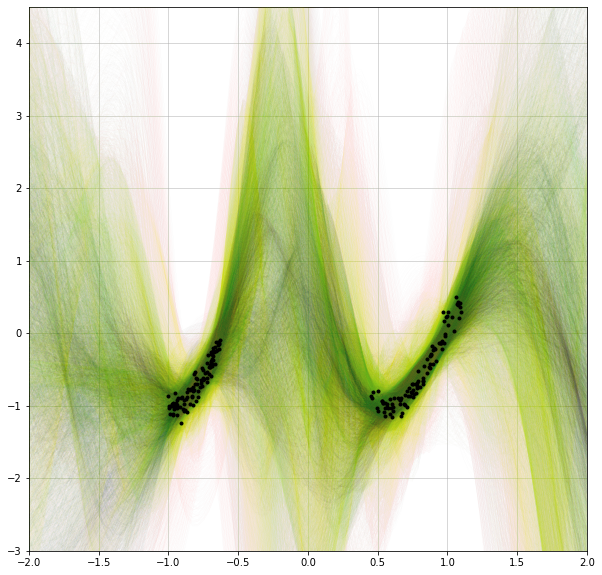

In [20]:
if setup.plot:
    fig=makePlot(setup,GeN,noise, alpha=0.01)


In [21]:
Z=[]

for i in range(colors.shape[0]):
    for j in range(colors.shape[1]):
        xy_noise=torch.Tensor([noise[0][i,j],noise[1][i,j]]).unsqueeze(0).to(device)
        Z.append(GeN.components[0].hnet(xy_noise).detach().squeeze(0))

In [22]:
Z=torch.stack(Z)
Z.shape

torch.Size([14400, 151])

In [23]:

C=[]
for i in range(colors.shape[0]):
    for j in range(colors.shape[1]):
        C.append(colors[i,j])

In [24]:
colors_stack=torch.stack(C)

In [25]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=100)
X_embedded =myTSNE.fit_transform(Z.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.38464224338531494


(14400, 3)

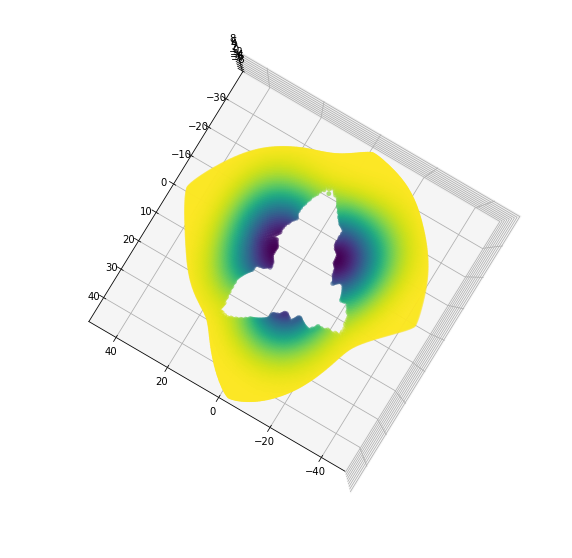

In [27]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


fig = plt.figure(figsize=(10, 10))


cmap = cm.viridis_r
ax = fig.gca(projection='3d')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2], c=colors_stack, linewidth=0.2, cmap=cmap)
#plt.title('3D t-SNE of '+str(param_count)+'-dimensional transformed noise')
ax.view_init(elev=90., azim=120)
plt.savefig('tSNE.pdf')
plt.show()





In [38]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=5)
X_embedded =myTSNE.fit_transform(GeN(1000).detach().cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.34294936060905457


(1000, 3)

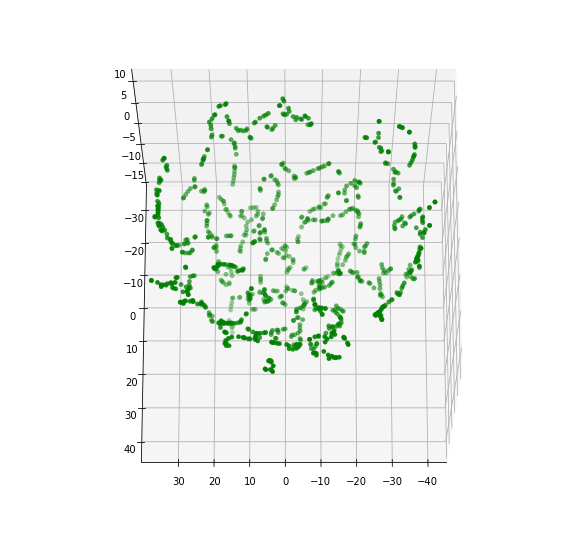

In [39]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


fig = plt.figure(figsize=(10, 10))


cmap = cm.viridis_r
ax = fig.gca(projection='3d')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2], c='green', linewidth=0.2, cmap=cmap)
#plt.title('3D t-SNE of '+str(param_count)+'-dimensional transformed noise')
ax.view_init(elev=70., azim=90)
plt.savefig('tSNE.pdf')
plt.show()





In [27]:
GeNVI_theta=torch.cat([GeN.sample(500)[0],GeN.sample(500)[1]],dim=0)#GeN(1110).detach()

In [28]:
PTMCMC_theta=torch.load('mlruns/4/0eb6f8d414d1424784fa76fed8506198/artifacts/theta.pt')
#'mlruns/4/814abccf119b4eb1a0f68c1f67dc773f/artifacts/theta.pt')
#'mlruns/4/74654e3a649f4f47a71234edee2e4424/artifacts/theta.pt')[0:-1:1]


In [29]:
PTMCMC_theta.shape

torch.Size([1111, 151])

In [30]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=20)
X_embedded =myTSNE.fit_transform(PTMCMC_theta.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.058822307735681534


(1111, 3)

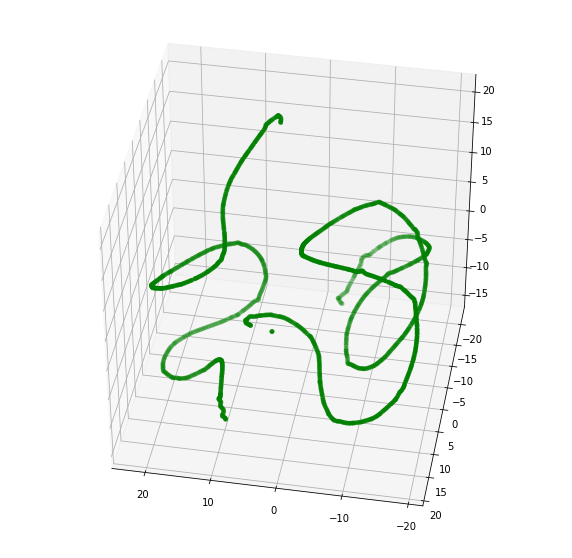

In [31]:
%matplotlib inline


from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2], linewidth=0.2, color='green')
#plt.title('3D t-SNE of '+str(param_count)+'-dimensional transformed noise')

ax.view_init(elev=40., azim=100)
plt.savefig('PTMCMC_tSNE.pdf')
plt.show()


In [32]:
def KL(theta0,theta1,k=1):
        """
        Parameters:
            theta0 (Tensor): Samples, P X NbDimensions   
            theta1 (Tensor): Samples, R X NbDimensions   
            k (Int): positive ordinal number 

        Returns:
            (Float) k-Nearest Neighbour Estimation of the KL from theta0 to theta1  

        Kullback-Leibler Divergence Estimation of Continuous Distributions Fernando Pérez-Cruz
        """
        
        n0=theta0.shape[0]
        n1=theta1.shape[0]
        dim0=theta0.shape[1]
        dim1=theta1.shape[1]
        assert dim0 == dim1
        
   
        
        D0=torch.cdist(theta0,theta0)
        D1=torch.cdist(theta0,theta1)
        

        a0 = torch.topk(D0, k=k+1, dim=1, largest=False, sorted=True)[0][:,k]#.clamp(torch.finfo().eps,float('inf')).to(device)
        a1 = torch.topk(D1, k=k, dim=1, largest=False, sorted=True)[0][:,k-1]#.clamp(torch.finfo().eps,float('inf')).to(device)
        
        assert a0.shape == a1.shape
        
        d=torch.as_tensor(float(dim0),device=device)
        N0=torch.as_tensor(float(n0),device=device)
        N1=torch.as_tensor(float(n1),device=device)
        
        Mnn=(torch.log(a1)-torch.log(a0)).mean()
        return dim0*Mnn + N1.log()-(N0-1).log()

In [33]:
N=1000
K=torch.Tensor(N)
P_theta=PTMCMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(GeN(500).detach(),P_theta[indices[500:]], k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(419.2432) (tensor(8.0073))


In [34]:
N=1000
K=torch.Tensor(N)
P_theta=PTMCMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(P_theta[indices[500:]],GeN(500).detach(), k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(458.2726) (tensor(1.5487))


In [35]:
N=1000
K=torch.Tensor(N)
P_theta=PTMCMC_theta.to(device)
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    K[i]=KL(GeN(500).detach(),GeN(500).detach(), k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(-0.0374) (tensor(4.3876))


In [36]:
X=torch.arange(-2.,2.,0.03).to(device)

In [37]:
N=1000
K=torch.Tensor(N)
P_theta_pred=model(X,PTMCMC_theta.to(device)).squeeze()
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    GeNVI_pred=model(X,GeN(500).detach()).squeeze()
    K[i]=KL(GeNVI_pred,P_theta_pred[indices[500:]], k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(139.0296) (tensor(4.4577))


In [38]:
N=1000
K=torch.Tensor(N)
P_theta_pred=model(X,PTMCMC_theta.to(device)).squeeze()
indices=list(range(P_theta.shape[0]))

for i in range(N):
    np.random.shuffle(indices)
    GeNVI_pred=model(X,GeN(500).detach()).squeeze()
    K[i]=KL(P_theta_pred[indices[500:]],GeNVI_pred, k=2)

print('KL: '+str(K.mean())+' ('+str(K.std())+')')

KL: tensor(126.6886) (tensor(4.3025))


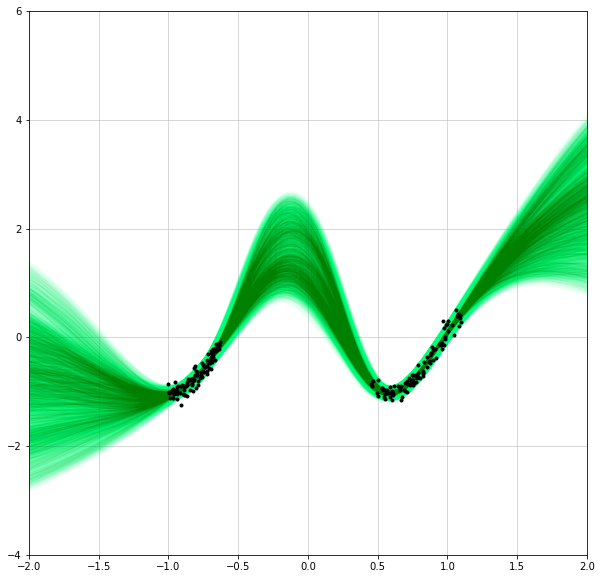

In [80]:
x=setup.makePlot(PTMCMC_theta,device)
x.savefig('PTMCMC_green_pred.png')


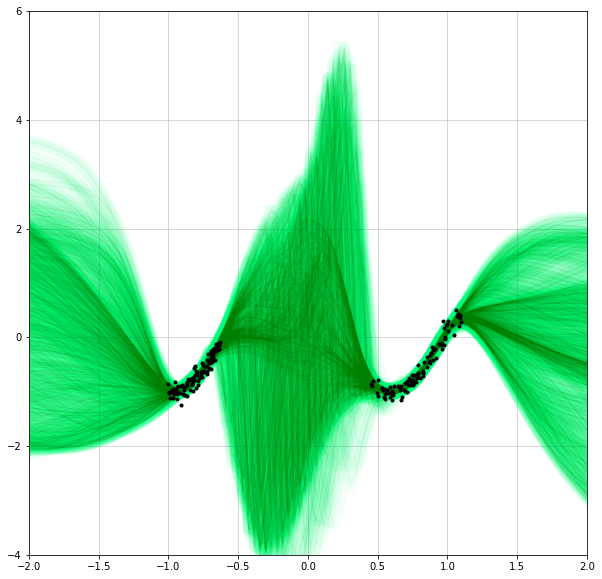

In [33]:
fig=setup.makePlot(GeNVI_theta,device)
fig.savefig('GeNVI_green_pred.svg')

In [29]:
N=PTMCMC_theta.shape[0]
GeNVI_pred=model(X,GeN(N).detach()).squeeze()
PTMCMC_pred=model(X,PTMCMC_theta.to(device)).squeeze()
theta_pred=torch.cat([GeNVI_pred, PTMCMC_pred])
c=torch.cat([torch.zeros(N), torch.ones(N)])
theta_pred.shape

NameError: name 'PTMCMC_theta' is not defined

In [35]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=35)
X_embedded_pred =myTSNE.fit_transform(theta_pred.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.5591526627540588


(1111, 3)

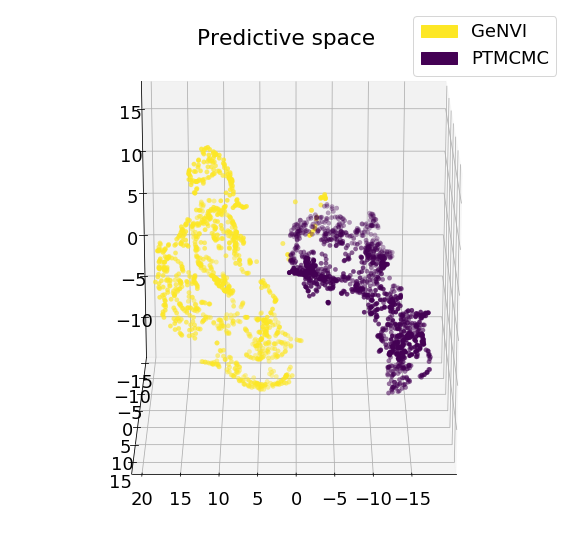

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded_pred[:,0],X_embedded_pred[:,1],X_embedded_pred[:,2],c=c, linewidth=0.2, cmap=cmap)
plt.title('Predictive space')
ax.view_init(elev=20., azim=90)


GeNVI_patch = mpatches.Patch(color=cmap(0.), label='GeNVI')
PTMCMC_patch = mpatches.Patch(color=cmap(1.), label='PTMCMC')
plt.legend(handles=[GeNVI_patch,PTMCMC_patch])
plt.savefig('Predictive_tSNE.pdf')
plt.show()

In [46]:
theta=torch.cat([GeN.sample(500).detach()[0],GeN.sample(500).detach()[1], PTMCMC_theta.to(device)],)
c=torch.cat([torch.zeros(500), 0.5*torch.ones(500), torch.ones(1111)])


In [28]:
theta=torch.cat([GeN(N).detach(), PTMCMC_theta.to(device)])
theta.shape

NameError: name 'N' is not defined

In [44]:
from sklearn.manifold import TSNE
myTSNE=TSNE(n_components=3,init='pca',perplexity=100)
X_embedded =myTSNE.fit_transform(theta.cpu())
print(myTSNE.kl_divergence_)
X_embedded.shape

0.09536398947238922


(2111, 3)

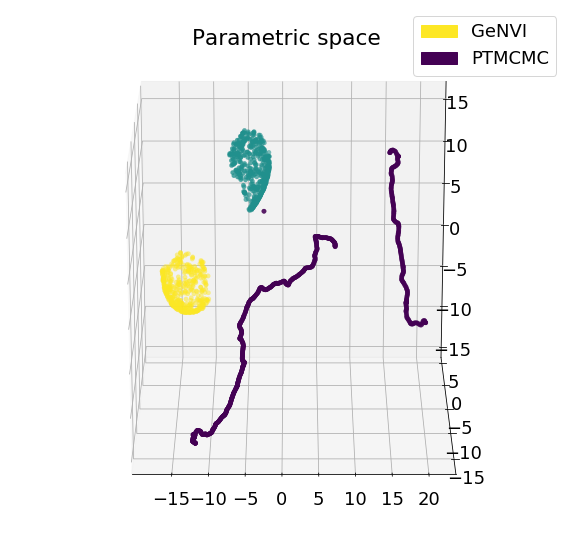

In [51]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 18})


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=c, linewidth=0.2, cmap=cmap)
plt.title('Parametric space')

ax.view_init(elev=20., azim=270)

GeNVI_patch = mpatches.Patch(color=cmap(0.), label='GeNVI')
PTMCMC_patch = mpatches.Patch(color=cmap(1.), label='PTMCMC')
plt.legend(handles=[GeNVI_patch,PTMCMC_patch])

plt.savefig('Parametric_tSNE.pdf')
plt.show()



Text(0.5, 1.0, '134 vs 73')

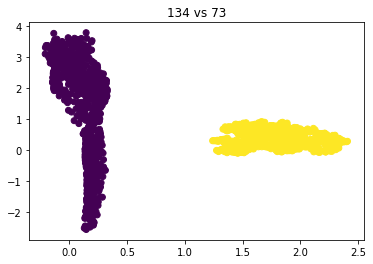

In [59]:
%matplotlib inline
i=np.random.randint(0,theta.shape[1])
j=np.random.randint(0,theta.shape[1])
X=theta[:,i].cpu()
Y=theta[:,j].cpu()
plt.scatter(X,Y, c=c)
plt.title(str(i)+' vs '+str(j))